In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_video = pd.read_csv('C:/CUOIKY_KPDL/Cuoi_Ky/data/tiktok_videos.csv')
df_comment = pd.read_csv('C:/CUOIKY_KPDL/Cuoi_Ky/data/tiktok_comments.csv')

In [4]:
print("Shape:", df_video.shape)
print("Columns:", df_video.columns.tolist())
print("Shape:", df_comment.shape)
print("Columns:", df_comment.columns.tolist())

Shape: (1098, 6)
Columns: ['video_url', 'video_id', 'caption', 'like_count', 'comment_count', 'share_count']
Shape: (43801, 3)
Columns: ['video_id', 'user', 'text']


In [5]:
df_video.info()
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_url      1098 non-null   object 
 1   video_id       1098 non-null   int64  
 2   caption        892 non-null    object 
 3   like_count     1091 non-null   float64
 4   comment_count  1091 non-null   float64
 5   share_count    1086 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 51.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43801 entries, 0 to 43800
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  43801 non-null  int64 
 1   user      43801 non-null  object
 2   text      40787 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [7]:
df_video.describe()

,video_id,like_count,comment_count,share_count
count,1.098000e+03,1.091000e+03,1091.00000,1.086000e+03
mean,7.582982e+18,1.448761e+05,1742.95967,5.014076e+04
std,9.877618e+15,5.908679e+05,5588.24416,3.529264e+05
min,7.466426e+18,0.000000e+00,0.00000,0.000000e+00
25%,7.582948e+18,9.586000e+03,151.50000,7.020000e+02
50%,7.584312e+18,4.470000e+04,517.00000,3.713000e+03
75%,7.585213e+18,1.200000e+05,1453.50000,1.780000e+04
max,7.586979e+18,1.520000e+07,127700.00000,9.200000e+06


In [15]:
df_video = df_video.drop_duplicates(subset=['video_id'])
df_comment = df_comment.drop_duplicates(subset=['video_id'])

In [9]:
missing = df_video.isnull().sum()
missing_percent = (missing / len(df_video)) * 100

pd.DataFrame({
    "missing_count": missing,
    "missing_percent (%)": missing_percent
}).sort_values(by="missing_percent (%)", ascending=False)

,missing_count,missing_percent (%)
caption,206,18.761384
share_count,12,1.092896
like_count,7,0.637523
comment_count,7,0.637523
video_url,0,0.000000
video_id,0,0.000000


In [10]:
missing = df_comment.isnull().sum()
missing_percent = (missing / len(df_comment)) * 100

pd.DataFrame({
    "missing_count": missing,
    "missing_percent (%)": missing_percent
}).sort_values(by="missing_percent (%)", ascending=False)

,missing_count,missing_percent (%)
text,3014,6.881121
video_id,0,0.000000
user,0,0.000000


In [16]:
df_video["caption"] = df_video["caption"].fillna("")
df_video[["like_count", "comment_count", "share_count"]] = (
    df_video[["like_count", "comment_count", "share_count"]].fillna(0)
)

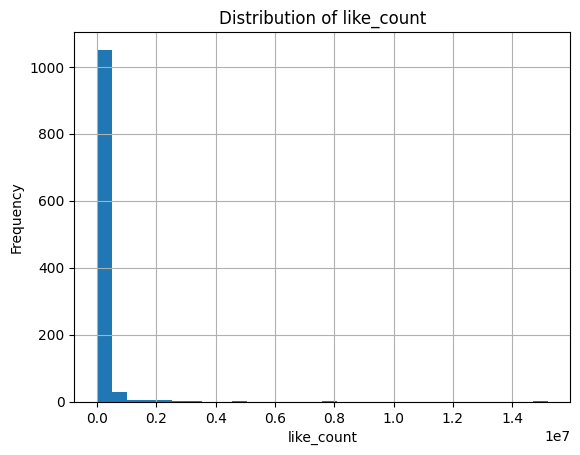

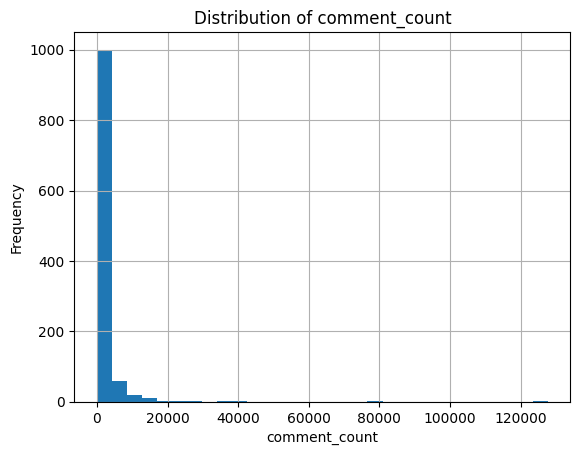

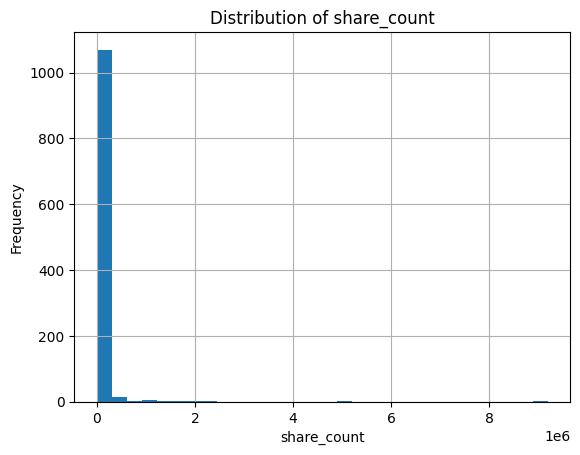

In [17]:
num_cols = ["like_count", "comment_count", "share_count"]

for col in num_cols:
    plt.figure()
    df_video[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [18]:
for col in num_cols:
    df_video[f"log_{col}"] = np.log1p(df_video[col])

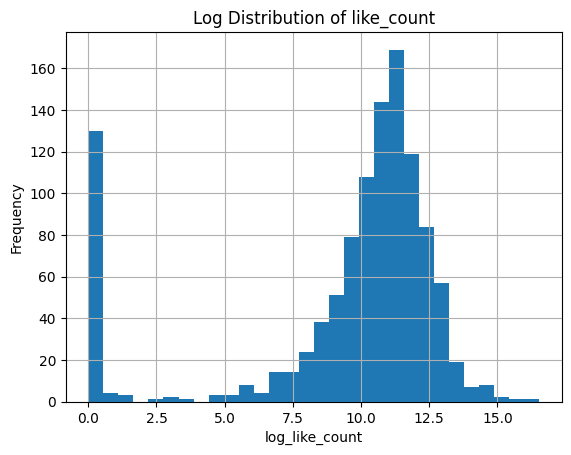

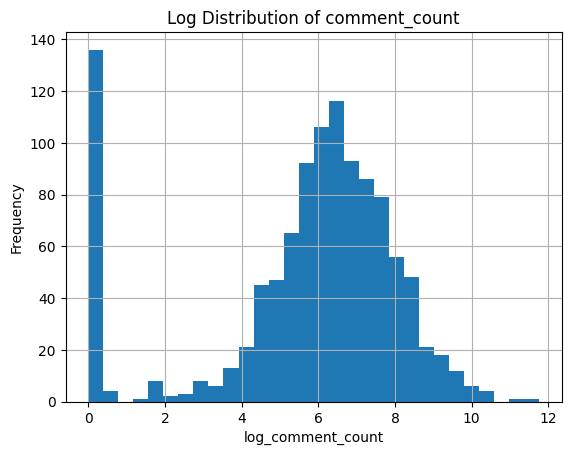

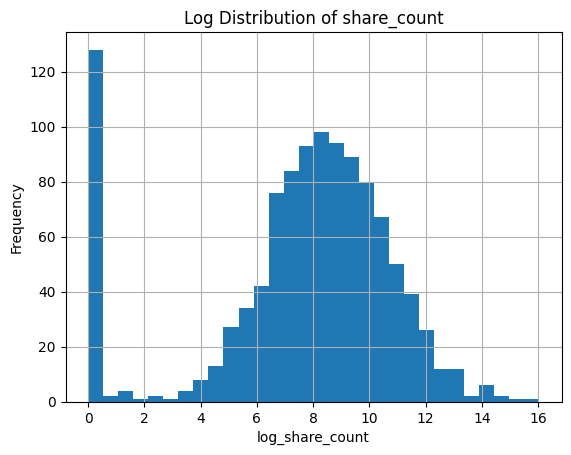

In [19]:
for col in num_cols:
    plt.figure()
    df_video[f"log_{col}"].hist(bins=30)
    plt.title(f"Log Distribution of {col}")
    plt.xlabel(f"log_{col}")
    plt.ylabel("Frequency")
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3648\1014613075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_video_counts.index, y=author_video_counts.values, palette='viridis')


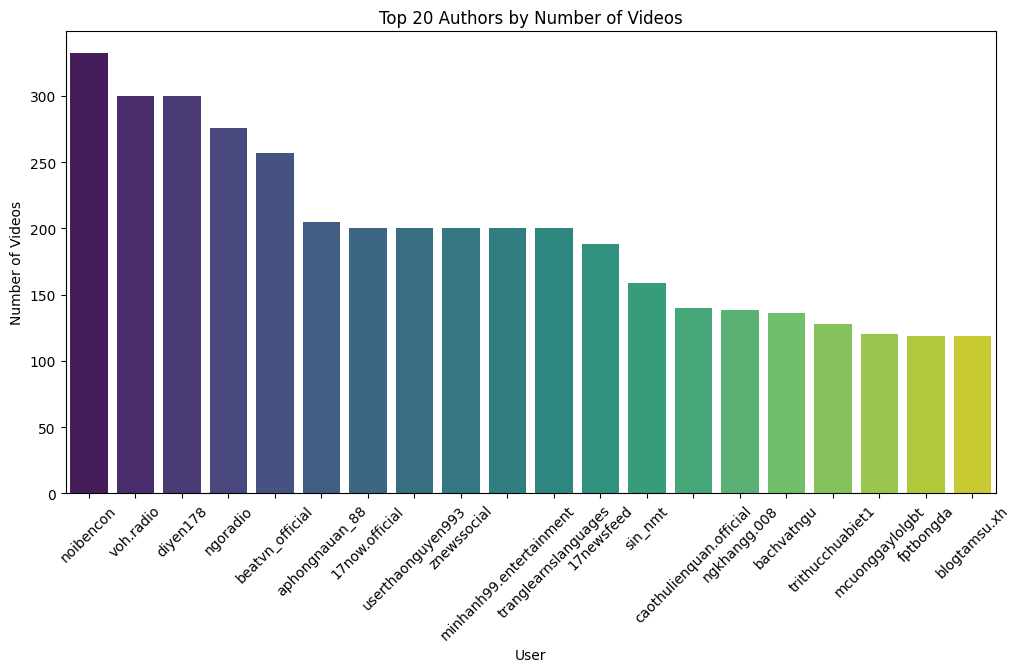

In [20]:
# Visualize count video per author
author_video_counts = df_comment['user'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_video_counts.index, y=author_video_counts.values, palette='viridis')
plt.title('Top 20 Authors by Number of Videos')
plt.xlabel('User')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3648\1786373793.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video_id', y='like_count', data=top_10_likes, palette='Blues_d')


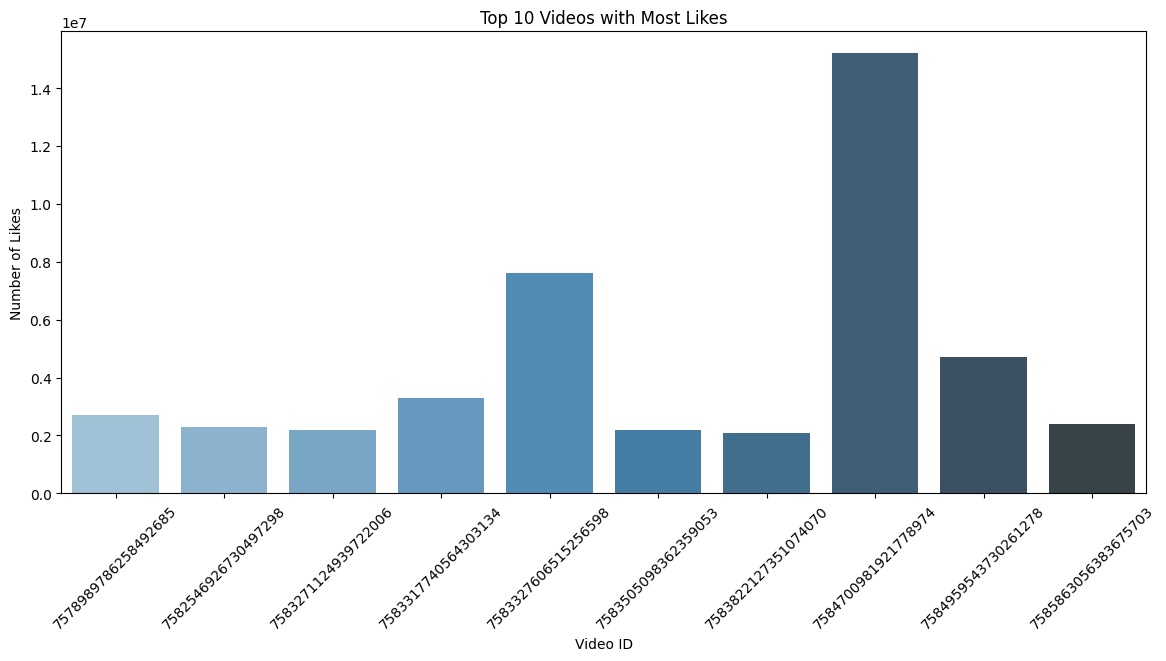

In [21]:
# Vẽ biểu đồ thể hiện video có nhiều like nhất cụm 10
top_10_likes = df_video.nlargest(10, 'like_count')[['video_id', 'like_count']]
bottom_10_likes = df_video.nsmallest(10, 'like_count')[['video_id', 'like_count']]
plt.figure(figsize=(14, 6))
sns.barplot(x='video_id', y='like_count', data=top_10_likes, palette='Blues_d')
plt.title('Top 10 Videos with Most Likes')
plt.xlabel('Video ID')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.show()

In [23]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series[(series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)]

for col in num_cols:
    outliers = detect_outliers(df_video[col])
    print(f"{col}: {len(outliers)} outliers")


like_count: 105 outliers
comment_count: 122 outliers
share_count: 152 outliers


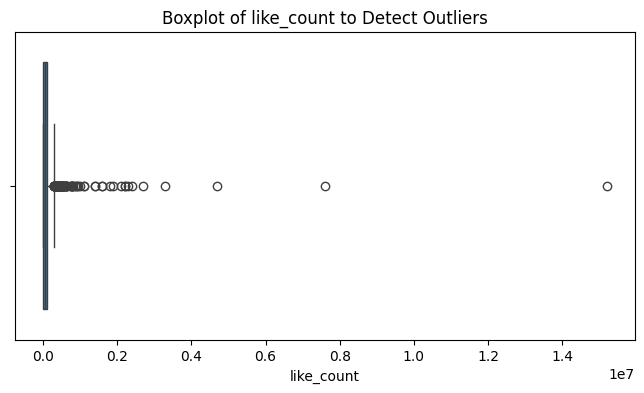

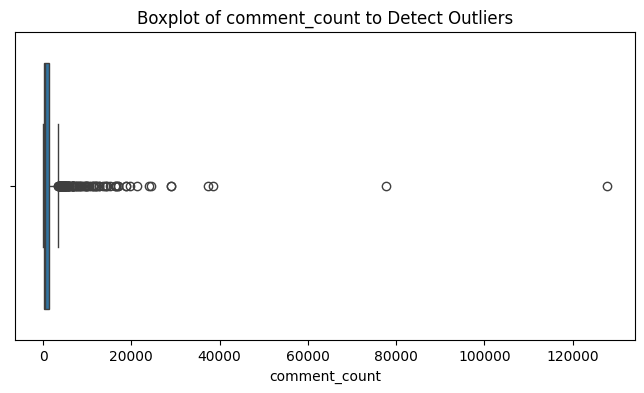

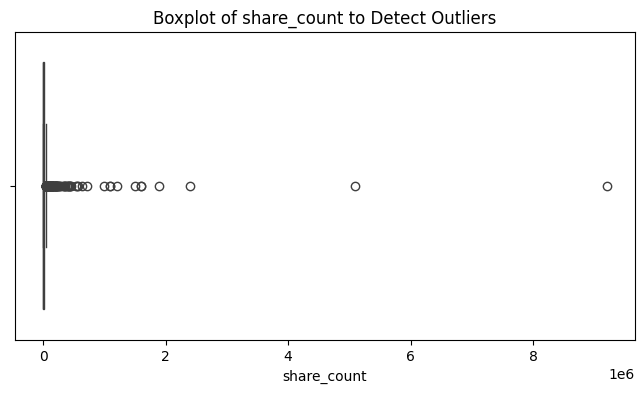

In [24]:
# visualize outliers
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_video[col])
    plt.title(f'Boxplot of {col} to Detect Outliers')
    plt.xlabel(col)
    plt.show()

In [26]:
df_video["caption_length"] = df_video["caption"].apply(len)
df_video["caption_word_count"] = df_video["caption"].apply(lambda x: len(x.split()))

df_video[["caption_length", "caption_word_count"]].describe()

,caption_length,caption_word_count
count,1098.000000,1098.000000
mean,43.130237,8.305100
std,44.903263,9.851439
min,0.000000,0.000000
25%,16.250000,3.000000
50%,42.500000,7.000000
75%,55.000000,11.000000
max,533.000000,125.000000


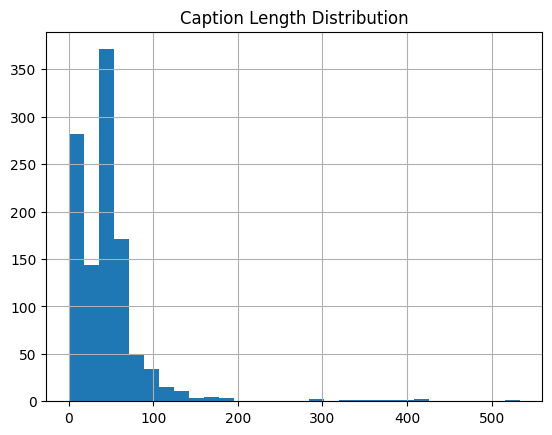

In [27]:
plt.figure()
df_video["caption_length"].hist(bins=30)
plt.title("Caption Length Distribution")
plt.show()